In [1]:
import scanpy as sc
import numpy as np

import os
import importlib

BASE_DIR = "../"

## QC 

### Preprocess

In [2]:
#Maybe move below to constants file
DATA_DIR = os.path.join(BASE_DIR,"data")
FIGURE_DIR = os.path.join(BASE_DIR,"figures")

NR_samples = {
    "NR1": os.path.join(DATA_DIR,"NR","AM3N207"),
    "NR2": os.path.join(DATA_DIR,"NR","AM3N208")
}
DR_samples = {
    "DR1": os.path.join(DATA_DIR,"DR","AM3N209"),
    "DR2": os.path.join(DATA_DIR,"DR","AM3N210")
}



In [3]:
import stereo_seq.utils.load as sul

output_dir = os.path.join(DATA_DIR,"aggregated")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

adata = sul.merge_dfs(NR_samples,f="filtered_feature_bc_matrix",out_f=os.path.join(output_dir,"NR.h5ad"),format="custom")

AnnData object with n_obs × n_vars = 32285 × 11962
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]
AnnData object with n_obs × n_vars = 32285 × 14773
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]


In [3]:
import stereo_seq.utils.preprocessing as sup
importlib.reload(sup)
#sc.pp.calculate_qc_metrics(adata,inplace=True)
#sup.precluster_QC(adata)

figure_dir = os.path.join(FIGURE_DIR,"NR","QC")
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

input_f = os.path.join(DATA_DIR,"aggregated","NR.h5ad")
adata=sc.read_h5ad(input_f)
sup.pipeline(adata,batch=True,output_f=os.path.join(DATA_DIR,"aggregated",""),figure_dir=figure_dir)

2024-01-20 10:53:38,665 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-01-20 10:53:42,145 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-01-20 10:53:42,220 - harmonypy - INFO - Iteration 1 of 10
2024-01-20 10:53:45,881 - harmonypy - INFO - Iteration 2 of 10
2024-01-20 10:53:49,704 - harmonypy - INFO - Iteration 3 of 10
2024-01-20 10:53:54,103 - harmonypy - INFO - Iteration 4 of 10
2024-01-20 10:53:58,036 - harmonypy - INFO - Iteration 5 of 10


KeyboardInterrupt: 

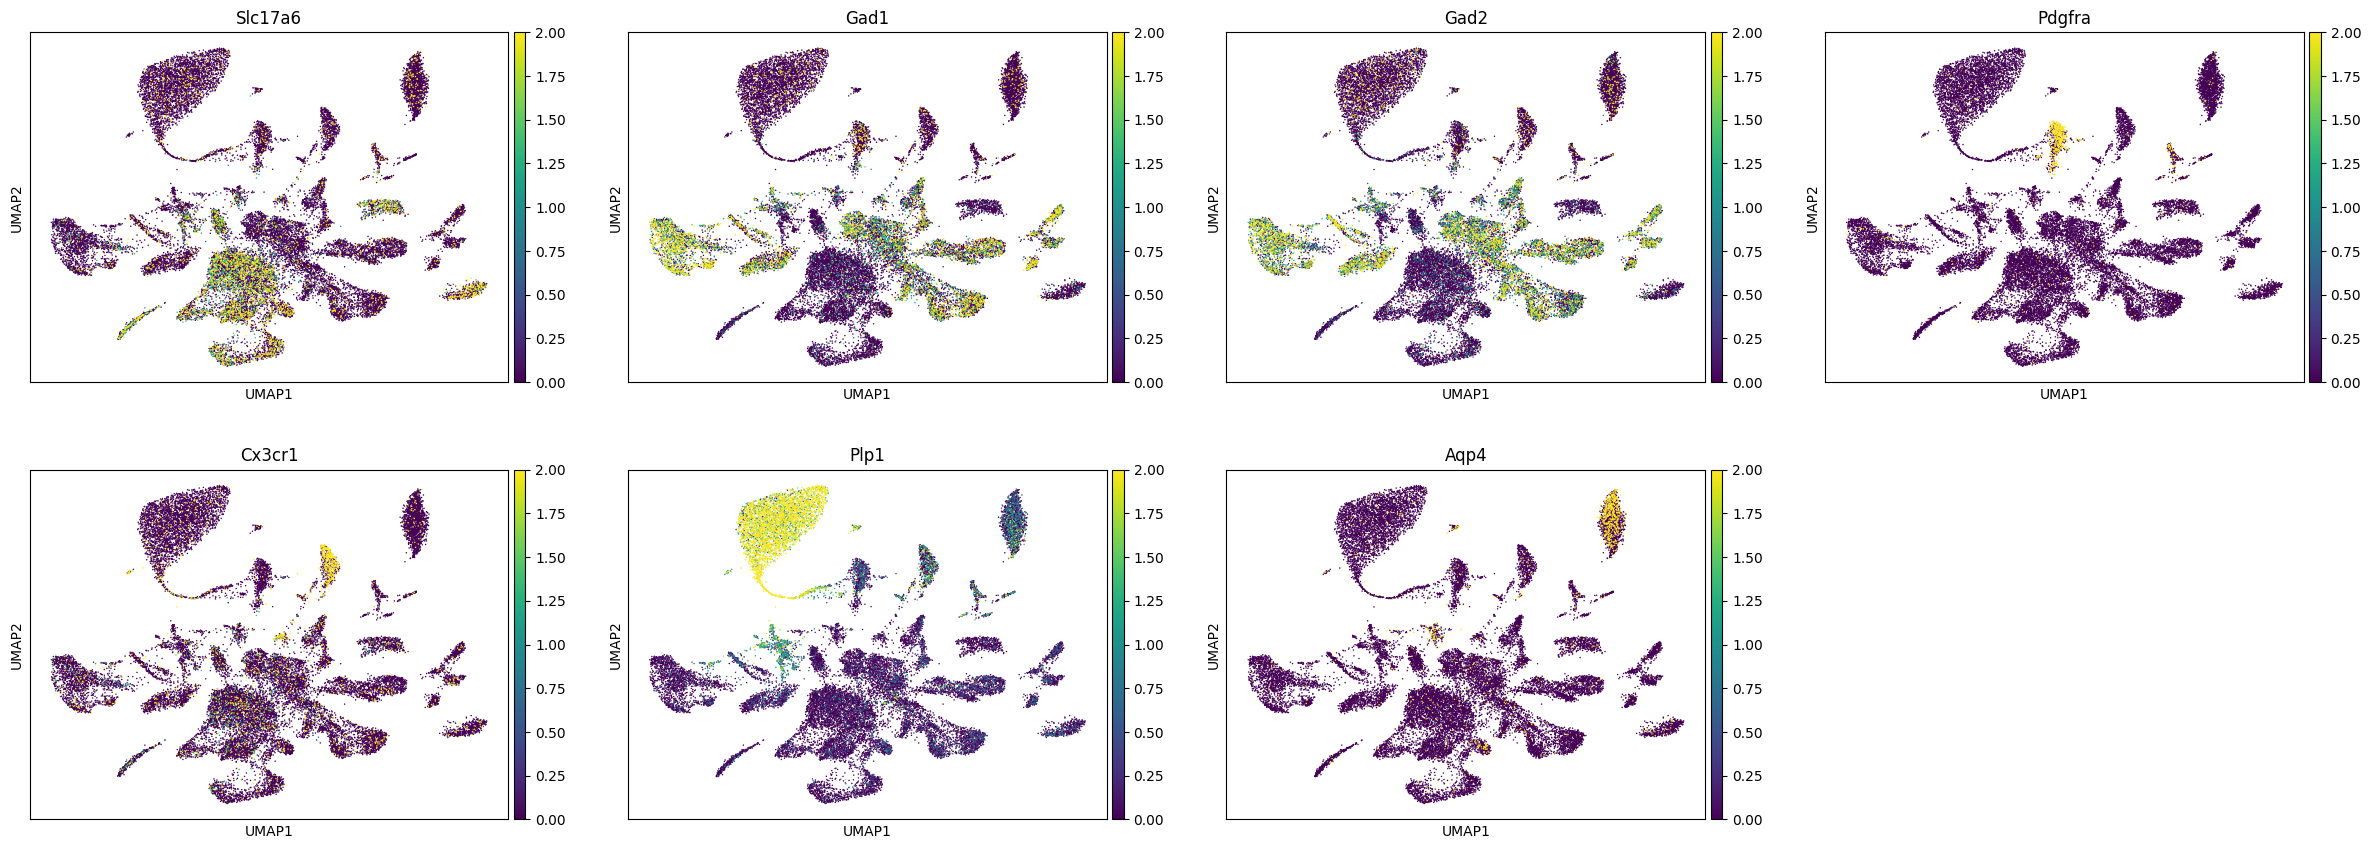

In [84]:
adata=sc.read_h5ad(os.path.join(DATA_DIR,"aggregated","NR_filt.h5ad"))
sc.pl.umap(adata,color=['Slc17a6','Gad1','Gad2','Pdgfra','Cx3cr1','Plp1','Aqp4'],use_raw=False,vmin=0,vmax=2)

In [89]:
adata_c = adata[adata.obs['class']=='Excitatory']

/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/preprocessing.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = adata.obs.groupby(cluster_col)[group].mean().reset_index(name=group)


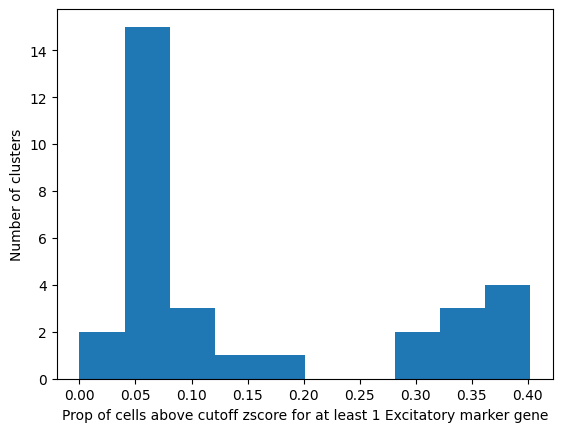

/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  

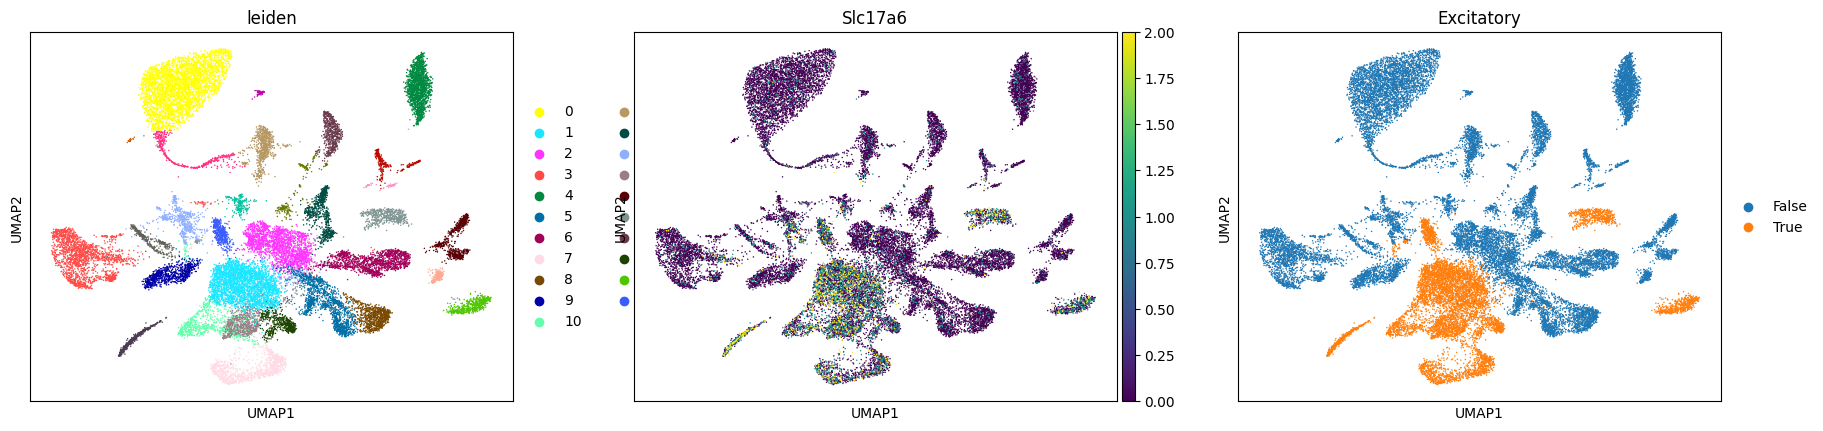

/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/preprocessing.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = adata.obs.groupby(cluster_col)[group].mean().reset_index(name=group)


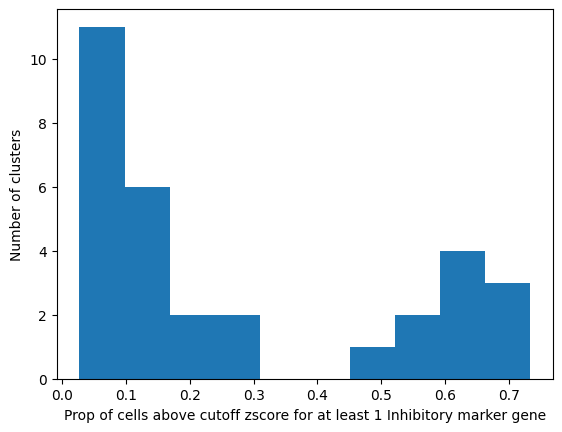

/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  

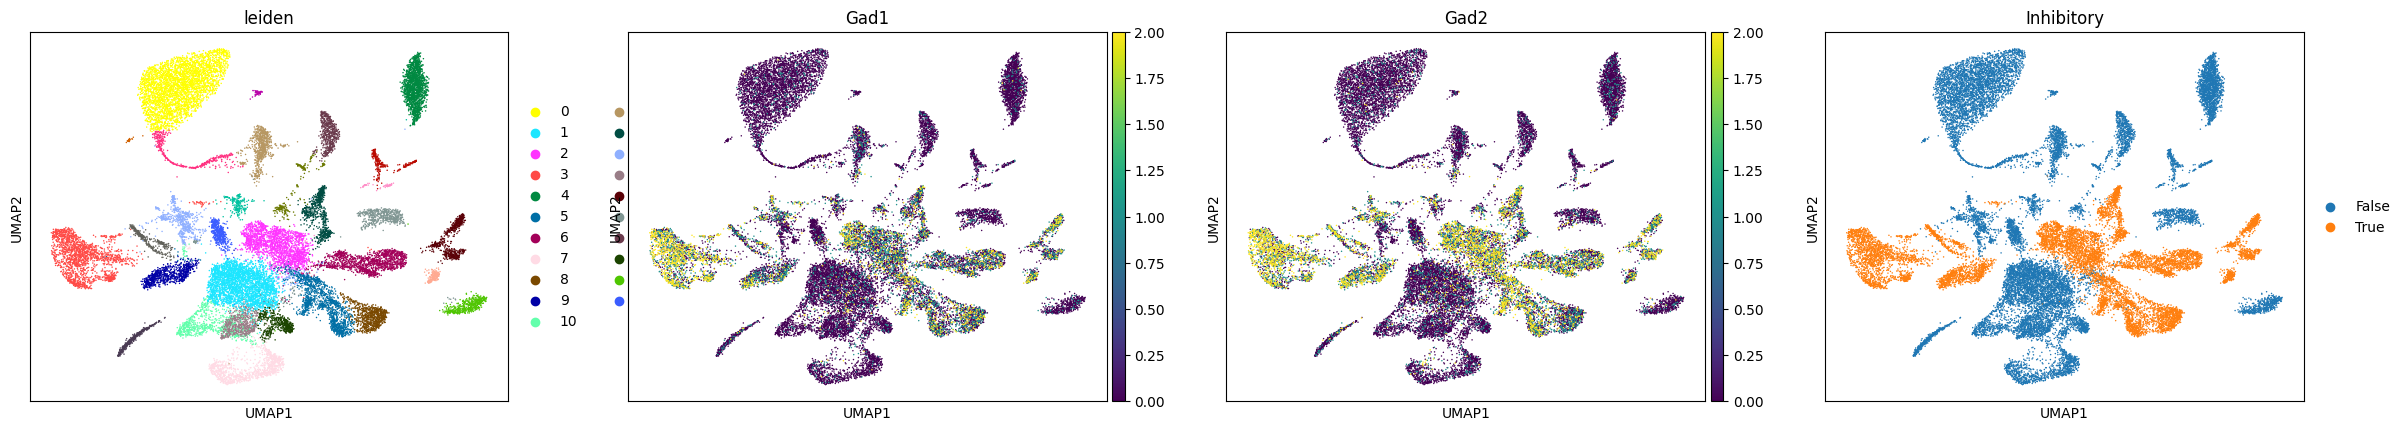

In [52]:
#import stereo_seq.utils.preprocessing as sup
importlib.reload(sup)

adata=sc.read_h5ad(os.path.join(DATA_DIR,"aggregated","NR_filt.h5ad"))
import matplotlib.pyplot as plt
import pandas as pd
groups={
    "Excitatory":{
        'marker_genes': ['Slc17a6'],
        'z-scores':[0.7],
        'pct_in': 0.2,
    },
    "Inhibitory":{
        'marker_genes':['Gad1','Gad2'],
        'z-scores':[1.0,1.0],
        'pct_in':0.4,
    }
}

output_dir= os.path.join(DATA_DIR,"aggregated")
df = sup.split_adata(adata,groups,output_dir=output_dir)

In [ ]:
"""Train on adata1 and predict on adata2"""
def compare_clustering(adata1,adata2,col1='leiden',col2='leiden',genes=None, cutoff=0.5,preprocess_1=False,preprocess_2=False, model_dir=os.path.join("models","SC_consistency"),model_name="consistency.xgb",output_dir=os.path.join("figures","SC_consistency"),train_dict_name="train_dict.pickle",output_f="my_vs_prev",train_key_added='my_cluster',use_sc_transform=False):
    for directory in [model_dir,output_dir]:
        if not os.path.exists(directory):
            os.mkdir(directory)
    
    if genes is not None:
        adata1=adata1[:,genes]
        adata2=adata2[:,genes]
    print(adata1)
    print(adata2)

    if preprocess_1:
        if 'raw' in adata1.layers:
            adata1.X = adata1.layers['raw'].copy()
        else:
            print("Warning: Assuming X is count matrix 1")
        preprocess_SC(adata1,filt_counts=False,use_sc_transform=use_sc_transform)
    if preprocess_2:
        if 'raw' in adata2.layers:
            adata2.X = adata2.layers['raw'].copy()
        else:
            print("Warning: Assuming X is count matrix 2")
        preprocess_SC(adata2,filt_counts=False,use_sc_transform=use_sc_transform)
    
    valid_model,model,train_dict,test_dict = cl.run_training_and_validation(adata=adata1,obs_id=col1,model_dir=model_dir, model_name=model_name,output_dir=output_dir, output_f =f"{cutoff}_validation.png",train_dict_name=train_dict_name,colsample_bytree=1,nround=200,max_cells_per_ident=1000,min_cells_per_ident=200,max_depth=4)
    # train_dict = cl.gen_dict(adata,col='leiden',prefix=None,unassigned_indicator='Unassigned')
    xgb_model_f=os.path.join(model_dir, f"valid_{model_name}")
    model = xgb.Booster()
    model.load_model(xgb_model_f)

    cl.apply_model(adata2,xgb_model_f,train_dict,cutoff=cutoff, output_dir=output_dir,output_f=output_f, unassigned_indicator='Unassigned', prefix=None, test_key=col2,train_key_added=train_key_added,prefix_key=None,xlabel='Predicted',ylabel='Previous Clustering') #Test key is usually clustering
    return adata2

    




   
"""
run="140g_rn102"

data_p=os.path.join("data",run,"preprocessed.h5ad")
datap2=os.path.join("data",run,"previous_SCT.h5ad")
adata=sc.read_h5ad(data_p)

adata2=sc.read_h5ad(datap2)

compare_clustering(adata1=adata,adata2=adata2, col1='leiden',preprocess=False)
"""


In [37]:
adata_ref = sc.read_h5ad(os.path.join(DATA_DIR,"atlas","Xie_SC.h5ad"))

#Add class level to Xie dataset
class_mapping = {}
for key in adata_ref.obs['celltype'].unique():
    if 'Ex-' in key:
        class_mapping[key] = 'Excitatory'
    elif 'In-' in key:
        class_mapping[key] = 'Inhibitory'
    else:
        class_mapping[key] = 'Non-neuronal'

adata_ref.obs['class'] = adata_ref.obs['celltype'].map(class_mapping)
genes = list(set(adata.var.index).intersection(set(adata_ref.var.index)))


In [ ]:
import stereo_seq.utils.preprocessing as sup
importlib.reload(sup)

for group in ['Excitatory','Inhibitory','Non-neuronal']:
    adata = sc.read_h5ad(os.path.join(DATA_DIR,"aggregated",f"NR_{group}.h5ad"))
    del adata.uns,adata.obsm,adata.obsp,adata.layers,adata.varm,adata.var

    figure_dir = os.path.join(FIGURE_DIR,"NR","classification")
    sup.pipeline(adata,batch=False,output_f=os.path.join(DATA_DIR,"aggregated",f"NR_{group}Clust.h5ad"),figure_dir=figure_dir)


Note: Not filtering for cells with too many mitochondrial genes
{'In-1': 0, 'In-10': 1, 'In-2': 2, 'In-3': 3, 'In-4': 4, 'In-5': 5, 'In-6': 6, 'In-7': 7, 'In-8': 8, 'In-9': 9, 'Unassigned': 10}
Running train/validation split
trainclassifier() complete after 237.0 seconds
{'In-1': 0, 'In-10': 1, 'In-2': 2, 'In-3': 3, 'In-4': 4, 'In-5': 5, 'In-6': 6, 'In-7': 7, 'In-8': 8, 'In-9': 9, 'Unassigned': 10} {'In-1': 0, 'In-10': 1, 'In-2': 2, 'In-3': 3, 'In-4': 4, 'In-5': 5, 'In-6': 6, 'In-7': 7, 'In-8': 8, 'In-9': 9}


/Users/kushalnimkar/miniforge3/envs/stereo_seq/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


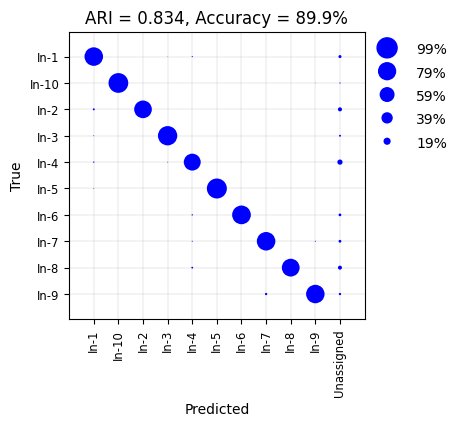

In [7]:
import stereo_seq.utils.classifier as suc
import stereo_seq.utils.load as sul
import stereo_seq.utils.preprocessing as sup
importlib.reload(sup)
importlib.reload(sul)
importlib.reload(suc)


train_col = 'celltype'
group_col = 'class'
adata_ref = sul.load_XieSC()

for group in ['Inhibitory']:
    
    model_dir = os.path.join(BASE_DIR,"models")
    model_name = f"Xie_SC_{group}"
    output_dir=os.path.join(BASE_DIR,"figures","NR","classification")
    train_dict_name = f"train_dict_{model_name}"
    cutoff=0.5

    adata = sc.read_h5ad(os.path.join(DATA_DIR,"aggregated",f"NR_{group}Clust.h5ad"))#Already preprocessed
    adata_ref = sul.load_XieSC()#Reload so i can delete and potentially save mem (having issue where it's not being freed)
    adata_refg = adata_ref[adata_ref.obs[group_col]==group]
    del adata_ref

    adata_refg = sup.preprocess(adata_refg)

    genes = list(set(adata.var.index).intersection(set(adata_refg.var.index)))

    adata._inplace_subset_var(genes)
    adata_refg._inplace_subset_var(genes)


    for f in [model_dir,output_dir]:
        if not os.path.exists(f):
            os.mkdir(f)

    valid_model,model,train_dict,test_dict = suc.run_training_and_validation(adata=adata_refg,obs_id=train_col,model_dir=model_dir, model_name=model_name,output_dir=output_dir, output_f =f"{model_name}_validation.png",train_dict_name=train_dict_name,colsample_bytree=1,nround=200,max_cells_per_ident=1000,min_cells_per_ident=200,max_depth=4)
    #xgb_model_f=os.path.join(model_dir, f"valid_{model_name}")
    #model = xgb.Booster()
    #model.load_model(xgb_model_f)
    #output_f="my_vs_prev"train_key_added='my_cluster'

    #suc.apply_model(adata,xgb_model_f,train_dict,cutoff=cutoff, output_dir=output_dir,output_f=output_f, unassigned_indicator='Unassigned', prefix=None, test_key='leiden',train_key_added=train_key_added,prefix_key=None,xlabel='Predicted',ylabel='Previous Clustering') #Test key is usually clustering

    





        

AnnData object with n_obs × n_vars = 8100 × 32285
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts', 'leiden', 'Excitatory', 'Inhibitory', 'class'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p'
    obsp: 'connectivities', 'distances'


/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/classifier.py:244: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adata.obs[test_key][0].isnumeric():
/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/plotting.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix[ytrue[i],ypred[i]] +=1


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21} {'Ex-1': 0, 'Ex-2': 1, 'Ex-3': 2, 'Ex-4': 3, 'Ex-5': 4, 'Ex-6': 5, 'Ex-7': 6, 'Ex-8': 7, 'Ex-9': 8, 'Unassigned': 9}


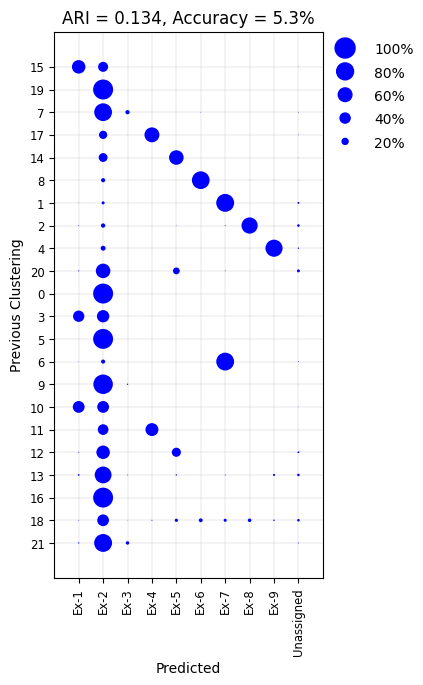

AnnData object with n_obs × n_vars = 10156 × 32285
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts', 'leiden', 'Excitatory', 'Inhibitory', 'class'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p'
    obsp: 'connectivities', 'distances'


/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/classifier.py:244: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adata.obs[test_key][0].isnumeric():
/Users/kushalnimkar/Documents/PhD/Stereo-seq_Wholebrain/stereo_seq/utils/plotting.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix[ytrue[i],ypred[i]] +=1


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25} {'In-1': 0, 'In-10': 1, 'In-2': 2, 'In-3': 3, 'In-4': 4, 'In-5': 5, 'In-6': 6, 'In-7': 7, 'In-8': 8, 'In-9': 9, 'Unassigned': 10}


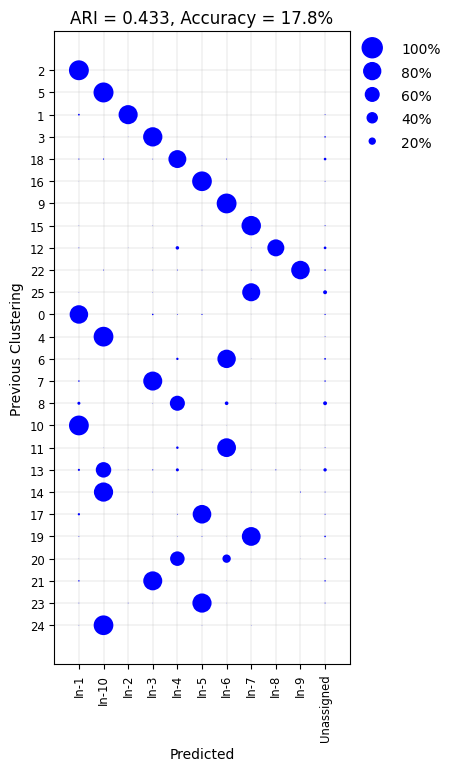

In [23]:
import xgboost as xgb
cutoff=0.5
output_dir=os.path.join(BASE_DIR,"figures","NR","classification")

genes = list(set(adata.var.index).intersection(set(adata_refg.var.index)))

for group in ['Excitatory','Inhibitory']:
    adata = sc.read_h5ad(os.path.join(DATA_DIR,"aggregated",f"NR_{group}Clust.h5ad"))#Already preprocessed
    print(adata)
    adata._inplace_subset_var(genes)
    model_dir = os.path.join(BASE_DIR,"models")
    model_name = f"Xie_SC_{group}"
    train_dict_name = f"train_dict_{model_name}"
    xgb_model_f=os.path.join(model_dir, f"valid_{model_name}")

    model = xgb.Booster()
    model.load_model(xgb_model_f)
    output_f=f"my_vs_prev{group}"
    suc.apply_model(
        adata,
        xgb_model_f,
        os.path.join(BASE_DIR,"models",train_dict_name),
        cutoff=cutoff,
        output_dir=output_dir,
        output_f=output_f,
        unassigned_indicator='Unassigned',
        prefix=None, 
        test_key='leiden',
        train_key_added='my_cluster',
        prefix_key=None,
        xlabel='Predicted',
        ylabel='Previous Clustering'
    ) #Test key is usually clustering

In [16]:
import pandas as pd
pd.crosstab(adata.obs['leiden'],adata.obs['my_cluster'])

my_cluster,In-1,In-10,In-2,In-3,In-4,In-5,In-6,In-7,In-8,Unassigned
leiden,,,,,,,,,,
0,0,872,0,0,0,0,0,0,1,0
1,4,43,1,0,2,0,460,0,0,23
2,7,68,2,1,4,0,8,394,3,34
3,228,256,0,0,0,0,0,0,0,2
4,0,75,0,0,0,0,0,2,393,13
5,2,465,0,0,0,0,0,0,0,0
6,3,53,0,0,0,0,378,0,0,6
7,0,373,55,0,0,4,0,0,0,5
8,1,53,1,1,0,366,1,2,2,3
